[AcPcsMl].[Ml].[Vta_Corregida_Colombia]

select * from [AcpcsMl].[Ml].[Vta_Corregida_Colombia_v]

In [1]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.8-py3-none-any.whl size=184055 sha256=32a8d0bb777191579343fa05f212590f6f9b0d5321e33e41c624878e7bae1f31
  Stored in directory: /root/.cache/pip/wheels/90/2b/16/c9baeb5fcd94a8a5bc4ea786fef2122f5b9ab3a61a7fc0303a
Successfully built pyod


In [2]:
# import pyodbc #para conexion a sql
import pandas as pd
import numpy as np
import seaborn as sns #graficar puntos faltantes
import matplotlib.pyplot as plt #gaficar boxplot
import warnings
warnings.filterwarnings('ignore')
from pyod.models.knn import KNN


In [ ]:
import pandas as pd

fecha_str = "01.2022"
fecha_datetime = pd.to_datetime(fecha_str + '-1', format='%W.%Y-%w')


In [ ]:
fecha_datetime

Timestamp('2022-01-03 00:00:00')

# Prueba EDA

In [ ]:
fecha_datetime

Timestamp('2022-01-03 00:00:00')

In [ ]:
df=pd.read_excel(r"/content/Venta Corregida OK.xlsx",sheet_name="10000")

In [ ]:
df['Fecha Corregida']=df['Fecha Corregida'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Centro Distribución  471 non-null    object 
 1   Producto             471 non-null    int64  
 2   Ratio                471 non-null    object 
 3   Un Med               471 non-null    object 
 4   Cantidad             471 non-null    float64
 5   Fecha                471 non-null    float64
 6   Semana               471 non-null    int64  
 7   Año                  471 non-null    int64  
 8   Fecha Corregida      471 non-null    object 
 9   Semana_Real          157 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 36.9+ KB


In [ ]:
df['Fecha Corregida'].unique()

array(['2021-01', '2022-01', '2023-01', '2021-02', '2022-02', '2023-02',
       '2021-03', '2022-03', '2023-03', '2021-04', '2022-04', '2023-04',
       '2021-05', '2022-05', '2023-05', '2021-06', '2022-06', '2023-06',
       '2021-07', '2022-07', '2023-07', '2021-08', '2022-08', '2021-09',
       '2022-09', '2020-10', '2021-10', '2022-10', '2020-11', '2021-11',
       '2022-11', '2020-12', '2021-12', '2022-12', '2020-13', '2021-13',
       '2022-13', '2020-14', '2021-14', '2022-14', '2020-15', '2021-15',
       '2022-15', '2020-16', '2021-16', '2022-16', '2020-17', '2021-17',
       '2022-17', '2020-18', '2021-18', '2022-18', '2020-19', '2021-19',
       '2022-19', '2020-20', '2021-20', '2022-20', '2020-21', '2021-21',
       '2022-21', '2020-22', '2021-22', '2022-22', '2020-23', '2021-23',
       '2022-23', '2020-24', '2021-24', '2022-24', '2020-25', '2021-25',
       '2022-25', '2020-26', '2021-26', '2022-26', '2020-27', '2021-27',
       '2022-27', '2020-28', '2021-28', '2022-28', 

In [ ]:
# Convertir la columna de cadenas de texto a objetos DateTime
df['fecha_datetime'] = pd.to_datetime(df['Fecha Corregida'] + '-1', format='%Y-%W-%w')

In [ ]:
# Ordenar el DataFrame por fecha
df = df.sort_values('fecha_datetime')
df

,Centro Distribución,Producto,Ratio,Un Med,Cantidad,Fecha,Semana,Año,Fecha Corregida,Semana_Real,fecha_datetime
75,NN97,1000000,Venta Corregida Total,ZUN,65.000,10.2020,10,2020,2020-10,NaN,2020-03-09
76,NN14,1000000,Venta Corregida Total,ZUN,68.000,10.2020,10,2020,2020-10,NaN,2020-03-09
77,NN13,1000000,Venta Corregida Total,ZUN,179.243,10.2020,10,2020,2020-10,10.0,2020-03-09
84,NN97,1000000,Venta Corregida Total,ZUN,85.000,11.2020,11,2020,2020-11,NaN,2020-03-16
85,NN14,1000000,Venta Corregida Total,ZUN,121.940,11.2020,11,2020,2020-11,NaN,2020-03-16
...,...,...,...,...,...,...,...,...,...,...,...
52,NN14,1000000,Venta Corregida Total,ZUN,76.758,6.2023,6,2023,2023-06,NaN,2023-02-06
53,NN13,1000000,Venta Corregida Total,ZUN,225.883,6.2023,6,2023,2023-06,6.0,2023-02-06
62,NN13,1000000,Venta Corregida Total,ZUN,244.975,7.2023,7,2023,2023-07,7.0,2023-02-13
60,NN97,1000000,Venta Corregida Total,ZUN,73.000,7.2023,7,2023,2023-07,NaN,2023-02-13


In [ ]:
df_nn13=df[df['Centro Distribución']=="NN13"]

In [ ]:
df_nn13

,Centro Distribución,Producto,Ratio,Un Med,Cantidad,Fecha,Semana,Año,Fecha Corregida,Semana_Real,fecha_datetime
77,NN13,1000000,Venta Corregida Total,ZUN,179.243,10.2020,10,2020,2020-10,10.0,2020-03-09
86,NN13,1000000,Venta Corregida Total,ZUN,249.458,11.2020,11,2020,2020-11,11.0,2020-03-16
95,NN13,1000000,Venta Corregida Total,ZUN,84.092,12.2020,12,2020,2020-12,12.0,2020-03-23
104,NN13,1000000,Venta Corregida Total,ZUN,103.395,13.2020,13,2020,2020-13,13.0,2020-03-30
113,NN13,1000000,Venta Corregida Total,ZUN,73.880,14.2020,14,2020,2020-14,14.0,2020-04-06
...,...,...,...,...,...,...,...,...,...,...,...
26,NN13,1000000,Venta Corregida Total,ZUN,288.457,3.2023,3,2023,2023-03,3.0,2023-01-16
35,NN13,1000000,Venta Corregida Total,ZUN,149.459,4.2023,4,2023,2023-04,4.0,2023-01-23
44,NN13,1000000,Venta Corregida Total,ZUN,150.549,5.2023,5,2023,2023-05,5.0,2023-01-30
53,NN13,1000000,Venta Corregida Total,ZUN,225.883,6.2023,6,2023,2023-06,6.0,2023-02-06


In [ ]:
import plotly.express as px

fig=px.line(df_nn13, x='fecha_datetime',y='Cantidad', title = 'Historico mat 1000000')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig=px.line(df_nn13, x='fecha_datetime',y='Cantidad', title = 'Historico mat 1000000')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y',step="year", stepmode="backward"),
                      dict(count=1, label='1M',step='month', stepmode="backward"),
                      dict(count=1, label='all',step='all', stepmode="backward")
                     ])
    ))
fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
df_nn132020=df_nn13[df_nn13['Año']==2020]
df_nn132021=df_nn13[df_nn13['Año']==2021]
df_nn132022=df_nn13[df_nn13['Año']==2022]
df_nn132023=df_nn13[df_nn13['Año']==2023]

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_nn132020['Semana'],y=df_nn132020['Cantidad'],
                         mode='lines', line=dict(color='red'), legendrank=True, name="2020"))
fig.add_trace(go.Scatter(x=df_nn132021['Semana'],y=df_nn132021['Cantidad'], 
                         mode='lines', line=dict(color='blue'), legendrank=True, name="2021"))
fig.add_trace(go.Scatter(x=df_nn132022['Semana'],y=df_nn132022['Cantidad'], 
                         mode='lines', line=dict(color='black'), legendrank=True, name="2022"))
fig.add_trace(go.Scatter(x=df_nn132023['Semana'],y=df_nn132023['Cantidad'], 
                         mode='lines', line=dict(color='orange'), legendrank=True, name="2023"))

# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#                       dict(count=1, label='1y',step="year", stepmode="backward"),
#                       dict(count=1, label='1M',step='month', stepmode="backward"),
#                       dict(count=1, label='all',step='all', stepmode="backward")
#                      ])
#     ))
fig.show()

In [ ]:
df_nn132021_2=df_nn13[(df_nn13['Año']==2021) | (df_nn13['Año']==2022)] 

In [ ]:
df_nn132021_2.head()

,Centro Distribución,Producto,Ratio,Un Med,Cantidad,Fecha,Semana,Año,Fecha Corregida,Semana_Real,fecha_datetime
2,NN13,1000000,Venta Corregida Total,ZUN,216.637,1.2021,1,2021,2021-01,1.0,2021-01-04
11,NN13,1000000,Venta Corregida Total,ZUN,157.064,2.2021,2,2021,2021-02,2.0,2021-01-11
20,NN13,1000000,Venta Corregida Total,ZUN,189.669,3.2021,3,2021,2021-03,3.0,2021-01-18
29,NN13,1000000,Venta Corregida Total,ZUN,215.910,4.2021,4,2021,2021-04,4.0,2021-01-25
38,NN13,1000000,Venta Corregida Total,ZUN,171.880,5.2021,5,2021,2021-05,5.0,2021-02-01


In [ ]:
df_nn132021_2[['Semana','Cantidad']].groupby('Semana').describe()

In [ ]:
df_nn132021_2[['Semana','Cantidad']].groupby('Semana').agg({'Cantidad':['max','min','std']})

In [ ]:
df_nn97=df[df['Centro Distribución']=="NN97"]

In [ ]:
df_nn14=df[df['Centro Distribución']=="NN14"]

<AxesSubplot:>

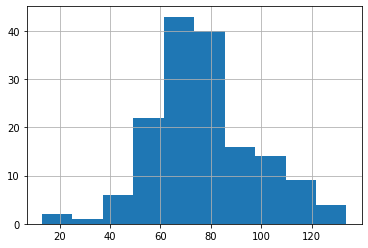

In [ ]:
df_nn14.Cantidad.hist()

<AxesSubplot:>

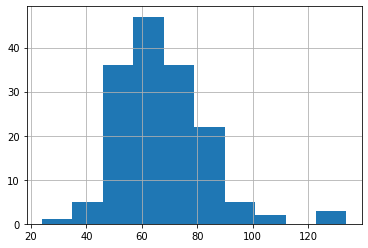

In [ ]:
df_nn97['Cantidad'].hist()

<AxesSubplot:>

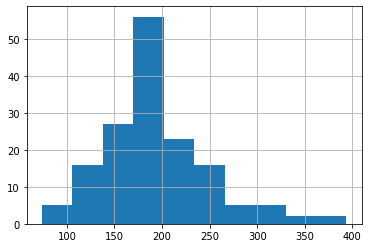

In [ ]:
df_nn13['Cantidad'].hist()

<AxesSubplot:ylabel='Density'>

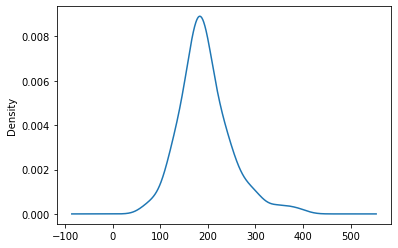

In [ ]:
df_nn13['Cantidad'].plot(kind='density')

In [ ]:
df_nn13_dt=df_nn13.set_index('fecha_datetime')

In [ ]:
df_nn13_dt.index

DatetimeIndex(['2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30',
               '2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27',
               '2020-05-04', '2020-05-11',
               ...
               '2022-12-12', '2022-12-19', '2022-12-26', '2023-01-02',
               '2023-01-09', '2023-01-16', '2023-01-23', '2023-01-30',
               '2023-02-06', '2023-02-13'],
              dtype='datetime64[ns]', name='fecha_datetime', length=157, freq=None)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 51)'>

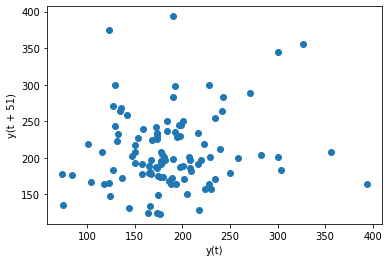

In [ ]:
pd.plotting.lag_plot(df_nn13_dt['Cantidad'],lag=51)

In [ ]:
df_semanas=df_nn132021[['Semana','Cantidad']].merge(df_nn132022[['Semana','Cantidad']],on='Semana',how='left').merge(df_nn132020[['Semana','Cantidad']],on='Semana',how='left')


In [ ]:
df_semanas.iloc[9:]

,Semana,Cantidad_x,Cantidad_y,Cantidad
9,10,166.517,197.639,179.243
10,11,177.608,231.910,249.458
11,12,219.215,267.910,84.092
12,13,131.820,147.910,103.395
13,14,135.790,264.639,73.880
14,15,124.000,182.519,101.000
15,16,134.699,179.790,143.576
16,17,208.486,164.759,74.940
17,18,164.789,236.789,172.970
18,19,192.850,187.609,165.789


In [ ]:
import seaborn as sns

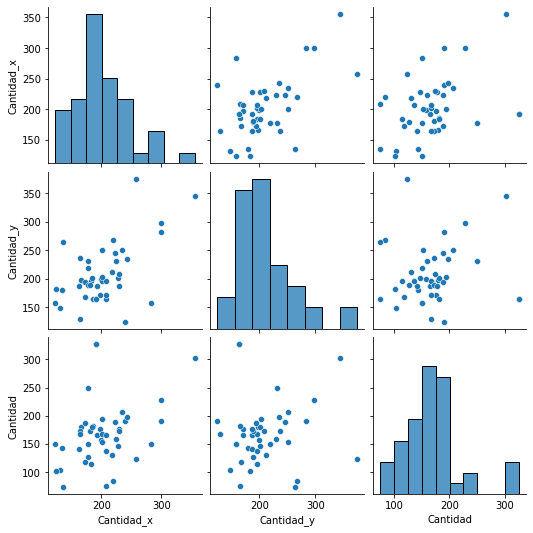

In [ ]:
sns.pairplot(df_semanas.iloc[9:][['Cantidad_x','Cantidad_y','Cantidad']])

In [ ]:
correlation=df_semanas.iloc[9:][['Cantidad_x','Cantidad_y','Cantidad']].corr(method='pearson')

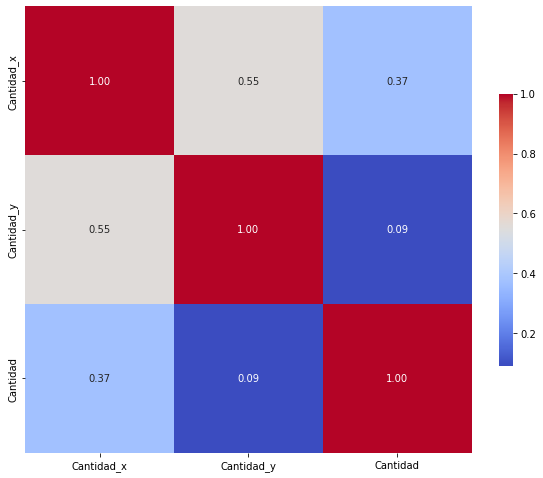

In [ ]:
g=sns.heatmap(correlation,square=True,cbar_kws={"shrink": .5},annot=True,fmt='.2f',cmap="coolwarm")
g.figure.set_size_inches(10,10)

plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

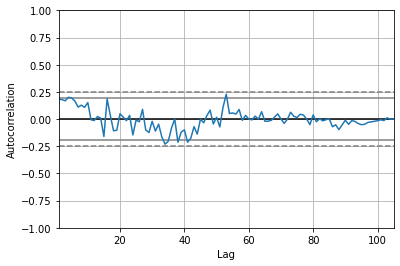

In [ ]:
pd.plotting.autocorrelation_plot(df_nn13_dt[(df_nn13_dt['Año']==2021) | (df_nn13_dt['Año']==2022)]['Cantidad'])

In [ ]:
df_nn13_dt['Cantidad'].resample("1m").mean()

fecha_datetime
2020-03-31    154.04700
2020-04-30     98.34900
2020-05-31    160.42475
2020-06-30    157.97660
2020-07-31    148.29700
2020-08-31    152.49200
2020-09-30    159.51650
2020-10-31    172.69125
2020-11-30    180.20860
2020-12-31    263.85775
2021-01-31    172.87000
2021-02-28    163.14525
2021-03-31    174.39600
2021-04-30    150.74375
2021-05-31    178.32920
2021-06-30    191.21350
2021-07-31    209.59225
2021-08-31    191.98360
2021-09-30    200.48650
2021-10-31    209.42625
2021-11-30    246.06800
2021-12-31    256.51000
2022-01-31    262.98980
2022-02-28    191.84975
2022-03-31    211.34225
2022-04-30    197.92675
2022-05-31    206.54740
2022-06-30    190.51600
2022-07-31    217.38750
2022-08-31    190.66280
2022-09-30    187.58575
2022-10-31    212.78300
2022-11-30    212.21375
2022-12-31    260.26700
2023-01-31    221.51820
2023-02-28    235.42900
Freq: M, Name: Cantidad, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

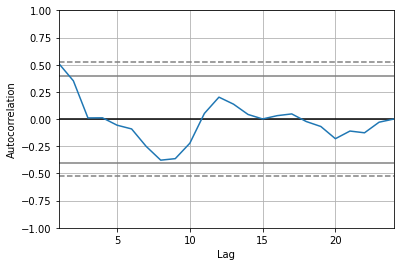

In [ ]:
pd.plotting.autocorrelation_plot(df_nn13_dt[(df_nn13_dt['Año']==2021) | (df_nn13_dt['Año']==2022)]['Cantidad'].resample("1m").mean())

# EDA Con los Datos Reales

In [ ]:
df=pd.read_excel(r"/content/Pronosticos_.xlsx",sheet_name="Hoja1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78889 entries, 0 to 78888
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   semana            78889 non-null  datetime64[ns]
 1   Codmat            78889 non-null  object        
 2   cant              78889 non-null  float64       
 3   semanacalendario  78889 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.4+ MB


In [ ]:
df.head()

,semana,Codmat,cant,semanacalendario
0,2020-03-02,NN13-1000497,1891.000,2020.1
1,2020-03-02,NN13-1000498,544.333,2020.1
2,2020-03-02,NN13-1000794,4370.000,2020.1
3,2020-03-02,NN13-1000814,10.000,2020.1
4,2020-03-02,NN13-1000820,489.500,2020.1


In [ ]:
#Restructura la tabla 
dfs=df.pivot(index='semana',columns="Codmat",values='cant')
dfs

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000814,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000840,NN13-1000845,NN13-1000849,...,NNB8-1045787,NNB8-1046292,NNB8-1047173,NNB8-1047642,NNB8-1047909,NNB8-1049156,NNB8-1053497,NNB8-1054251,NNB8-1055778,NNB8-1055779
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,10.0,489.5,56.0,976.500,56.0,1842.0,433.000,...,126.0,1301.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,20.0,782.5,70.0,1177.000,150.0,2863.0,371.000,...,203.0,1334.426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,31.0,354.0,66.0,515.500,45.5,1543.0,796.000,...,159.0,1880.568,13.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,24.0,564.0,80.0,950.000,58.0,2294.0,723.000,...,1.0,1829.283,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,9.0,462.5,44.0,907.000,45.5,1805.0,589.000,...,107.0,1541.282,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,NaN,667.5,68.0,1584.500,81.0,4589.0,562.000,...,631.0,1712.995,144.871,161.0,NaN,NaN,534.909,30.0,NaN,NaN
2023-01-23,1573.0,319.667,866.0,30.0,636.5,177.0,1270.438,118.0,2134.0,461.757,...,331.0,1476.067,121.012,72.0,NaN,NaN,389.909,39.0,NaN,NaN
2023-01-30,2155.0,484.333,1074.0,NaN,647.0,36.0,891.000,87.0,4432.0,508.000,...,452.9,1554.283,88.184,121.0,NaN,NaN,460.909,16.0,NaN,NaN


<AxesSubplot:xlabel='Codmat', ylabel='semana'>

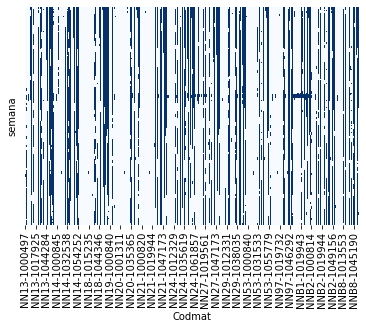

In [ ]:
#identificar faltaltes en las series (azul oscuro zonas con datos faltantes)
sns.heatmap(dfs.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

### Restricción últimas 4 semanas
* Existen materiales que no tienen información de venta de las ultimas 4 semanas. Se decide seleccionar estos materiales y socializarlos con el área de negocio (regla 1).

In [ ]:
#Creterio: Excluir series que le falten las últimas 4 semanas y revisar en detalle
w4=dfs[-4:].isnull().sum()
sem4=w4[w4==4]
fw4=pd.DataFrame(sem4.index)

In [ ]:
#materiales que cumplen
fw=w4[w4<4]
fw=pd.DataFrame(fw.index)
#fw

In [ ]:
#seleccionamos del dataframe orignal los que sirven
dfp_2=pd.merge(df,fw,how='inner',left_on='Codmat',right_on='Codmat')
dfp_2

,semana,Codmat,cant,semanacalendario
0,2020-03-02,NN13-1000497,1891.000,2020.10
1,2020-03-09,NN13-1000497,1393.000,2020.11
2,2020-03-16,NN13-1000497,2639.000,2020.12
3,2020-03-23,NN13-1000497,2957.000,2020.13
4,2020-03-30,NN13-1000497,2680.000,2020.14
...,...,...,...,...
74995,2023-01-16,NN21-1032957,2288.000,2023.03
74996,2023-01-23,NN21-1032957,1784.292,2023.04
74997,2023-01-30,NN21-1032957,3696.000,2023.05
74998,2023-02-06,NN21-1032957,3344.000,2023.06


In [ ]:
#actualizar series de tiempo con información reciente
dfs_2=dfs.drop(sem4.index,axis=1)
dfs_2

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000814,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000840,NN13-1000845,NN13-1000849,...,NNB8-1035619,NNB8-1042123,NNB8-1043327,NNB8-1043643,NNB8-1045787,NNB8-1046292,NNB8-1047173,NNB8-1047642,NNB8-1053497,NNB8-1054251
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,10.0,489.5,56.0,976.500,56.0,1842.0,433.000,...,72.0,100.000,718.000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,20.0,782.5,70.0,1177.000,150.0,2863.0,371.000,...,70.0,138.000,719.500,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,31.0,354.0,66.0,515.500,45.5,1543.0,796.000,...,24.0,159.000,843.750,602.0,159.0,1880.568,13.000,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,24.0,564.0,80.0,950.000,58.0,2294.0,723.000,...,47.0,171.000,858.250,424.0,1.0,1829.283,11.000,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,9.0,462.5,44.0,907.000,45.5,1805.0,589.000,...,59.0,186.000,731.750,688.0,107.0,1541.282,7.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,NaN,667.5,68.0,1584.500,81.0,4589.0,562.000,...,62.0,60.000,501.637,1025.5,631.0,1712.995,144.871,161.0,534.909,30.0
2023-01-23,1573.0,319.667,866.0,30.0,636.5,177.0,1270.438,118.0,2134.0,461.757,...,44.0,47.236,597.000,1180.0,331.0,1476.067,121.012,72.0,389.909,39.0
2023-01-30,2155.0,484.333,1074.0,NaN,647.0,36.0,891.000,87.0,4432.0,508.000,...,42.0,51.000,498.000,1036.0,452.9,1554.283,88.184,121.0,460.909,16.0


## Completitud de la serie

* Existen materiales que presentan un porcentaje de valores perdidos mayor al 20% se recomienda revisar estas series (regla 2).

In [ ]:
#dfp_2.groupby(['codmat']).semana.agg({'Minimun_Date': "min",  'Maximun_Date': "max",'Cant_sem':np.count_nonzero})
dfcomp=dfp_2.groupby('Codmat')['semana'].agg(Minimun_Date='min',Maximun_Date='max',Cant_sem=np.count_nonzero)
#convertir columnas a fecha
dfcomp['Maximun_Date'] = pd.to_datetime(dfcomp['Maximun_Date'])
dfcomp['Minimun_Date']=pd.to_datetime(dfcomp['Minimun_Date'])

#pasara a semanas de direrencia
dfcomp['sem_rang']=np.floor((dfcomp['Maximun_Date']-dfcomp['Minimun_Date']).dt.days)/7

#procentajes de completitud
dfcomp['porcomp']=dfcomp['Cant_sem']/dfcomp['sem_rang']
#mostrar data frame
dfcomp

,Minimun_Date,Maximun_Date,Cant_sem,sem_rang,porcomp
Codmat,,,,,
NN13-1000497,2020-03-02,2023-02-13,155,154.0,1.006494
NN13-1000498,2020-03-02,2023-02-13,153,154.0,0.993506
NN13-1000794,2020-03-02,2023-02-13,155,154.0,1.006494
NN13-1000814,2020-03-02,2023-01-23,89,151.0,0.589404
NN13-1000820,2020-03-02,2023-02-13,155,154.0,1.006494
...,...,...,...,...,...
NNB8-1046292,2020-03-02,2023-02-13,155,154.0,1.006494
NNB8-1047173,2020-03-16,2023-02-13,153,152.0,1.006579
NNB8-1047642,2020-10-26,2023-02-13,121,120.0,1.008333


In [ ]:
#Filtro series >= 80%
m1=dfcomp['porcomp']>=0.7
m2=dfcomp['porcomp']<0.7

dfs_comp=dfcomp[m1].index
dfs_comp


Index(['NN13-1000497', 'NN13-1000498', 'NN13-1000794', 'NN13-1000820',
       'NN13-1000821', 'NN13-1000833', 'NN13-1000840', 'NN13-1000845',
       'NN13-1000849', 'NN13-1000852',
       ...
       'NNB8-1035619', 'NNB8-1042123', 'NNB8-1043327', 'NNB8-1043643',
       'NNB8-1045787', 'NNB8-1046292', 'NNB8-1047173', 'NNB8-1047642',
       'NNB8-1053497', 'NNB8-1054251'],
      dtype='object', name='Codmat', length=509)

In [ ]:
#Actualizar series con completidud mayor o igual al 80%
dfs_3=dfs_2[dfs_comp]
dfs_3

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000840,NN13-1000845,NN13-1000849,NN13-1000852,...,NNB8-1035619,NNB8-1042123,NNB8-1043327,NNB8-1043643,NNB8-1045787,NNB8-1046292,NNB8-1047173,NNB8-1047642,NNB8-1053497,NNB8-1054251
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.500,56.0,1842.0,433.000,1055.00,...,72.0,100.000,718.000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.000,150.0,2863.0,371.000,1068.00,...,70.0,138.000,719.500,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.500,45.5,1543.0,796.000,1685.00,...,24.0,159.000,843.750,602.0,159.0,1880.568,13.000,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.000,58.0,2294.0,723.000,2500.00,...,47.0,171.000,858.250,424.0,1.0,1829.283,11.000,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.000,45.5,1805.0,589.000,1702.00,...,59.0,186.000,731.750,688.0,107.0,1541.282,7.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,667.5,68.0,1584.500,81.0,4589.0,562.000,837.00,...,62.0,60.000,501.637,1025.5,631.0,1712.995,144.871,161.0,534.909,30.0
2023-01-23,1573.0,319.667,866.0,636.5,177.0,1270.438,118.0,2134.0,461.757,780.75,...,44.0,47.236,597.000,1180.0,331.0,1476.067,121.012,72.0,389.909,39.0
2023-01-30,2155.0,484.333,1074.0,647.0,36.0,891.000,87.0,4432.0,508.000,886.00,...,42.0,51.000,498.000,1036.0,452.9,1554.283,88.184,121.0,460.909,16.0


In [ ]:
fw2=pd.DataFrame(dfs_3.columns)
dfp_3=pd.merge(dfp_2,fw2,how='inner',left_on='Codmat',right_on='Codmat')
dfp_3

,semana,Codmat,cant,semanacalendario
0,2020-03-02,NN13-1000497,1891.000,2020.10
1,2020-03-09,NN13-1000497,1393.000,2020.11
2,2020-03-16,NN13-1000497,2639.000,2020.12
3,2020-03-23,NN13-1000497,2957.000,2020.13
4,2020-03-30,NN13-1000497,2680.000,2020.14
...,...,...,...,...
73608,2023-01-16,NN21-1032957,2288.000,2023.03
73609,2023-01-23,NN21-1032957,1784.292,2023.04
73610,2023-01-30,NN21-1032957,3696.000,2023.05
73611,2023-02-06,NN21-1032957,3344.000,2023.06


## Secuencia de NA en la serie

* Una vez se depuran aquellos materiales con una completitud menor al 80%, se encontró series con valores perdidos en secuencia, los cual dificultad el proceso de imputación de valores perdidos. Se recomienda revisar estas series. (Regla3)

In [ ]:
#Encontrar secuencias de NA en la serie 

#listas para guardar los resultados
racha=[]
racha_count=[]
nulos=[]
l=range(0,dfs_3.shape[1])
#Bluce para recorrer la cantidad de series
for i in l:
  #extracción de la serie
  serie=pd.DataFrame(dfs_3.iloc[:,i]).astype(str)
  cod=serie.columns[0]
 
  rf=dfcomp[dfcomp.index==cod]
  m3=serie.index>=min(rf['Minimun_Date'].astype(str))
  serie=serie.iloc[m3]

  #Conteo de racha
  serie['racha']=serie.iloc[:,0].groupby((serie.iloc[:,0]!=serie.iloc[:,0].shift()).cumsum()).cumcount()+1
  secue_na=serie[serie.iloc[:,0]=='nan']['racha'].max()
    
  #Guardar los resultados
  racha.append(cod)
  nulos.append((serie.iloc[:,0]=='nan').sum())
  racha_count.append(secue_na)

secuencia=pd.DataFrame(nulos,racha)
secuencia['Racha_Count']= racha_count
secuencia.columns=['Nulos','Racha_Nulos']
secuencia=secuencia.fillna(0)
secuencia

,Nulos,Racha_Nulos
NN13-1000497,0,0.0
NN13-1000498,2,2.0
NN13-1000794,0,0.0
NN13-1000820,0,0.0
NN13-1000821,0,0.0
...,...,...
NNB8-1046292,0,0.0
NNB8-1047173,0,0.0
NNB8-1047642,0,0.0
NNB8-1053497,0,0.0


In [ ]:
#unir todo en un solo dataframe
dfcomp_2=pd.merge(dfcomp,secuencia,how='inner',left_index=True,right_index=True)
dfcomp_2

,Minimun_Date,Maximun_Date,Cant_sem,sem_rang,porcomp,Nulos,Racha_Nulos
NN13-1000497,2020-03-02,2023-02-13,155,154.0,1.006494,0,0.0
NN13-1000498,2020-03-02,2023-02-13,153,154.0,0.993506,2,2.0
NN13-1000794,2020-03-02,2023-02-13,155,154.0,1.006494,0,0.0
NN13-1000820,2020-03-02,2023-02-13,155,154.0,1.006494,0,0.0
NN13-1000821,2020-03-02,2023-02-13,155,154.0,1.006494,0,0.0
...,...,...,...,...,...,...,...
NNB8-1046292,2020-03-02,2023-02-13,155,154.0,1.006494,0,0.0
NNB8-1047173,2020-03-16,2023-02-13,153,152.0,1.006579,0,0.0
NNB8-1047642,2020-10-26,2023-02-13,121,120.0,1.008333,0,0.0
NNB8-1053497,2021-12-06,2023-02-13,63,62.0,1.016129,0,0.0


In [ ]:
#extraer rachas mayores a 3 
dfs_4=  dfs_3[dfcomp_2[dfcomp_2['Racha_Nulos']<=3].index]
dfs_iqr=dfs_3[dfcomp_2[dfcomp_2['Racha_Nulos']<=3].index]
#dfs_1sd=dfs_3[dfcomp_2[dfcomp_2['Racha_Nulos']<=3].index]
#dfs_2sd=dfs_3[dfcomp_2[dfcomp_2['Racha_Nulos']<=3].index]
#dfs_3sd=dfs_3[dfcomp_2[dfcomp_2['Racha_Nulos']<=3].index]

#covertir indice en datetime
dfs_4.index = pd.to_datetime(dfs_4.index)
dfs_iqr.index=pd.to_datetime(dfs_iqr.index)
dfs_4.head(5)

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000845,NN13-1000849,NN13-1000852,NN13-1000853,...,NNB8-1035619,NNB8-1042123,NNB8-1043327,NNB8-1043643,NNB8-1045787,NNB8-1046292,NNB8-1047173,NNB8-1047642,NNB8-1053497,NNB8-1054251
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.5,1842.0,433.0,1055.0,644.0,...,72.0,100.0,718.00,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.0,2863.0,371.0,1068.0,630.0,...,70.0,138.0,719.50,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.5,1543.0,796.0,1685.0,773.0,...,24.0,159.0,843.75,602.0,159.0,1880.568,13.0,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.0,2294.0,723.0,2500.0,1138.0,...,47.0,171.0,858.25,424.0,1.0,1829.283,11.0,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.0,1805.0,589.0,1702.0,1093.0,...,59.0,186.0,731.75,688.0,107.0,1541.282,7.0,NaN,NaN,NaN


#Tratamiento de datos atípicos

In [ ]:
#Funciones para calcular las series con tratamiento de datos atípicos 
# Metodo del rango intercuartilico Q3+1.5(Q3-Q1) y Q1-1.5(Q3-Q1)
# Metos de la media + 1(68.3%),2(95.4%) y 3(99.7) desviaciones estandar 

def iqr(x):
  #atípicos por IQR
    #print(type(x))
    #x=pd.DataFrame(x)
    Q1=x.quantile(q=0.25)
    Q3=x.quantile(q=0.75)
    IQR=Q3-Q1
    LS=Q3+1.5*IQR
    LI=Q1-1.5*IQR
    m4=x>LS
    m5=x<LI
    #print(x.dtype  )
    #asigna limte superior a los que se salieron del rango
    for material in list(x.columns.values):
        x.loc[m4[material],material]=LS[material]
        
    for material in list(x.columns.values):
        x.loc[m5[material],material]=LI[material]   
        
    return x

In [ ]:
#resultados de las series 
#dfs_iqr=dfs_iqr.astype(float)
#dfs_iqr.iloc[:, 0:2].apply(iqr,axis=0)
dfs_iqr.transform(iqr,axis=0)
dfs_iqr=dfs_iqr.rename(columns=lambda x: str(x) + '_IQR')

#dfs_1sd.iloc[:, 0:1].apply(sd1,axis=0)
#dfs_1sd=dfs_1sd.rename(columns=lambda x: str(x) + '_1sd')

#dfs_2sd.apply(sd2,axis=0)
#dfs_2sd=dfs_2sd.rename(columns=lambda x: str(x) + '_2sd')

#dfs_3sd.apply(sd3,axis=0)
#dfs_3sd=dfs_3sd.rename(columns=lambda x: str(x) + '_3sd')

In [ ]:
dfs_iqr.index.max() 

Timestamp('2023-02-13 00:00:00')

In [ ]:
import plotly.graph_objects as go
def Tendencia (X, Y, TituloGraf, LeyendaX, LeyendaY, ): 

    fig = go.Figure(layout=go.Layout(xaxis={'type': 'category','title':LeyendaX} ,
                                 title = TituloGraf,
                                 yaxis = dict(title = LeyendaY)))
    fig.add_trace(go.Scatter(x=X, y=Y,
                    mode='lines+markers', 
                    #name='Ventas',
                    #showlegend  =  True
                       
                       ))


    fig.show()

In [ ]:
dfs=pd.merge(dfs_4,dfs_iqr,how='inner', left_index=True, right_index=True)


In [ ]:
#fecha minimas y maximas para los 5 escenarios 
dfcomp_f=dfp_2.groupby(['Codmat'])
dfcomp_f=dfcomp_f.agg(Minimun_Date=('semana',np.min),Maximun_Date=('semana',np.max),Cant_sem=('semana',np.count_nonzero))

dfcomp_iqr=dfp_2.groupby(['Codmat'])
dfcomp_iqr=dfcomp_iqr.agg(Minimun_Date=('semana',np.min),Maximun_Date=('semana',np.max),Cant_sem=('semana',np.count_nonzero))
dfcomp_iqr=dfcomp_iqr.rename(index=lambda x: str(x) + '_IQR')

dfcomp_f=dfcomp_f.append(dfcomp_iqr)
#dfcomp_f=dfcomp_f.append(dfcomp_1sd)
#dfcomp_f=dfcomp_f.append(dfcomp_2sd)
#dfcomp_f=dfcomp_f.append(dfcomp_3sd)
dfcomp_f

,Minimun_Date,Maximun_Date,Cant_sem
Codmat,,,
NN13-1000497,2020-03-02,2023-02-13,155
NN13-1000498,2020-03-02,2023-02-13,153
NN13-1000794,2020-03-02,2023-02-13,155
NN13-1000814,2020-03-02,2023-01-23,89
NN13-1000820,2020-03-02,2023-02-13,155
...,...,...,...
NNB8-1046292_IQR,2020-03-02,2023-02-13,155
NNB8-1047173_IQR,2020-03-16,2023-02-13,153
NNB8-1047642_IQR,2020-10-26,2023-02-13,121


In [ ]:
dfs

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000845,NN13-1000849,NN13-1000852,NN13-1000853,...,NNB8-1035619_IQR,NNB8-1042123_IQR,NNB8-1043327_IQR,NNB8-1043643_IQR,NNB8-1045787_IQR,NNB8-1046292_IQR,NNB8-1047173_IQR,NNB8-1047642_IQR,NNB8-1053497_IQR,NNB8-1054251_IQR
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.500,1842.0,433.000,1055.00,644.0,...,72.0,100.000,718.0000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.000,2863.0,371.000,1068.00,630.0,...,70.0,138.000,719.5000,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.500,1543.0,796.000,1685.00,773.0,...,24.0,159.000,792.9375,602.0,159.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.000,2294.0,723.000,2500.00,1138.0,...,47.0,171.000,792.9375,424.0,1.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.000,1805.0,589.000,1702.00,1093.0,...,59.0,186.000,731.7500,688.0,107.0,1541.282,14.0625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,667.5,68.0,1584.500,4589.0,562.000,837.00,656.0,...,62.0,60.000,501.6370,1025.5,630.2,1668.529,144.8710,161.0,534.909,30.0
2023-01-23,1573.0,319.667,866.0,636.5,177.0,1270.438,2134.0,461.757,780.75,421.0,...,44.0,47.236,597.0000,1180.0,331.0,1476.067,121.0120,72.0,389.909,39.0
2023-01-30,2155.0,484.333,1074.0,647.0,36.0,891.000,4432.0,508.000,886.00,957.0,...,42.0,51.000,498.0000,1036.0,452.9,1554.283,88.1840,121.0,460.909,16.0


# EDA

In [ ]:
fecha_str = "01.2022"
fecha_datetime = pd.to_datetime(fecha_str + '-1', format='%W.%Y-%w')

In [ ]:
dfp_3['Semana Corregida']=pd.to_datetime(dfp_3['Semana'] + '-1', format='%Y.%W-%w')

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2020-03-02 to 2023-02-13
Columns: 938 entries, NN13-1000497 to NNB8-1054251_IQR
dtypes: float64(938)
memory usage: 1.1 MB


In [ ]:
dfs

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000845,NN13-1000849,NN13-1000852,NN13-1000853,...,NNB8-1035619_IQR,NNB8-1042123_IQR,NNB8-1043327_IQR,NNB8-1043643_IQR,NNB8-1045787_IQR,NNB8-1046292_IQR,NNB8-1047173_IQR,NNB8-1047642_IQR,NNB8-1053497_IQR,NNB8-1054251_IQR
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.500,1842.0,433.000,1055.00,644.0,...,72.0,100.000,718.0000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.000,2863.0,371.000,1068.00,630.0,...,70.0,138.000,719.5000,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.500,1543.0,796.000,1685.00,773.0,...,24.0,159.000,792.9375,602.0,159.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.000,2294.0,723.000,2500.00,1138.0,...,47.0,171.000,792.9375,424.0,1.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.000,1805.0,589.000,1702.00,1093.0,...,59.0,186.000,731.7500,688.0,107.0,1541.282,14.0625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,667.5,68.0,1584.500,4589.0,562.000,837.00,656.0,...,62.0,60.000,501.6370,1025.5,630.2,1668.529,144.8710,161.0,534.909,30.0
2023-01-23,1573.0,319.667,866.0,636.5,177.0,1270.438,2134.0,461.757,780.75,421.0,...,44.0,47.236,597.0000,1180.0,331.0,1476.067,121.0120,72.0,389.909,39.0
2023-01-30,2155.0,484.333,1074.0,647.0,36.0,891.000,4432.0,508.000,886.00,957.0,...,42.0,51.000,498.0000,1036.0,452.9,1554.283,88.1840,121.0,460.909,16.0


In [ ]:
sns.pairplot(dfs.iloc[:,1:20])

Output hidden; open in https://colab.research.google.com to view.

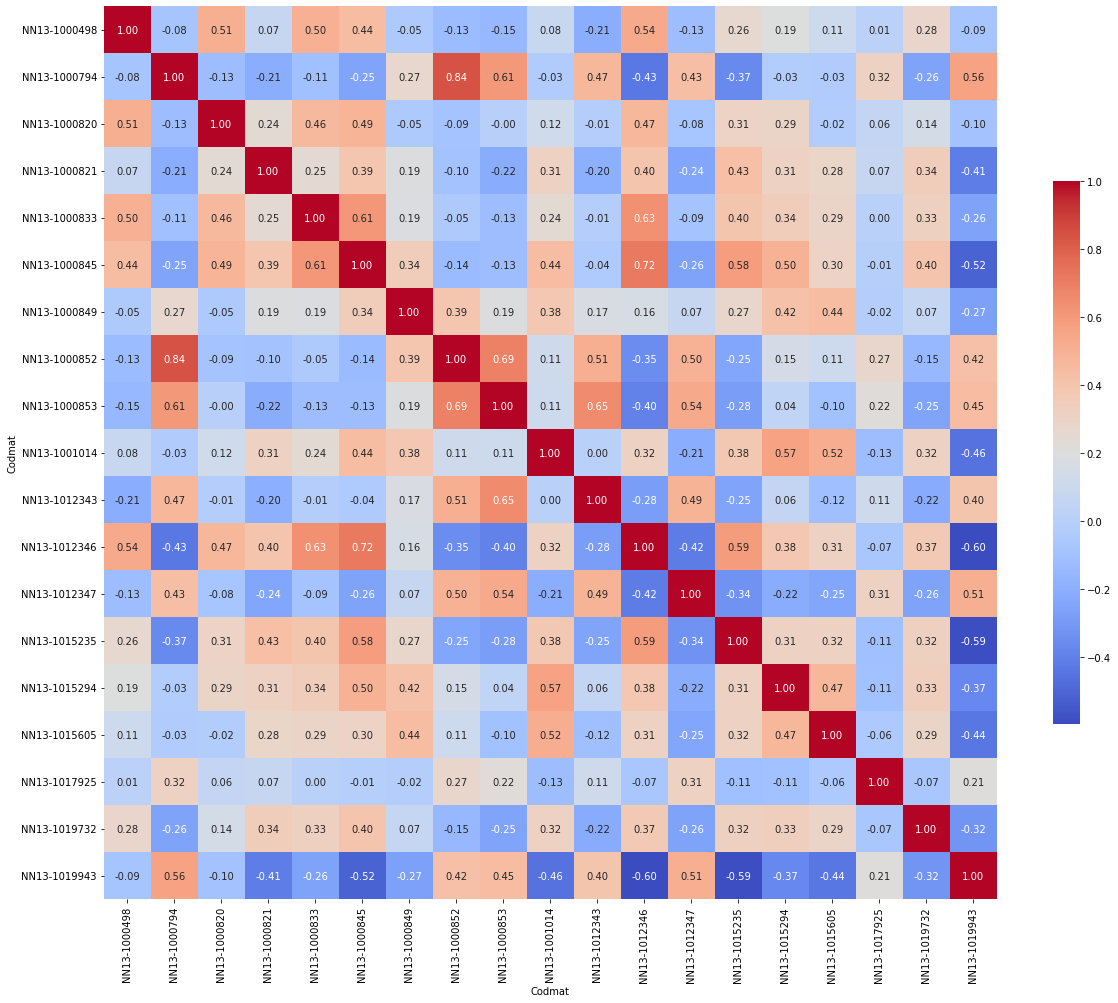

In [ ]:
correlation=dfs.iloc[:,1:20].corr(method='pearson')
g=sns.heatmap(correlation,square=True,cbar_kws={"shrink": .5},annot=True,fmt='.2f',cmap="coolwarm")
g.figure.set_size_inches(20,20)

plt.show()

In [ ]:
dfs.index

DatetimeIndex(['2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
               '2020-04-27', '2020-05-04',
               ...
               '2022-12-12', '2022-12-19', '2022-12-26', '2023-01-02',
               '2023-01-09', '2023-01-16', '2023-01-23', '2023-01-30',
               '2023-02-06', '2023-02-13'],
              dtype='datetime64[ns]', name='semana', length=155, freq=None)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
#fig=px.line(dfs, x=dfs.index,y='NN13-1012346', title = 'NN13-1012346 VS NN13-1019943')

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=dfs.index,y=dfs['NN13-1012346'],
                         mode='lines', line=dict(color='red'), legendrank=True, name="NN13-1012346"))
fig.add_trace(go.Scatter(x=dfs.index,y=dfs['NN13-1019943'], 
                         mode='lines', line=dict(color='blue'), legendrank=True, name="NN13-1019943"))

#fig.update_xaxes(rangeslider_visible=True)
fig.show()

<AxesSubplot:>

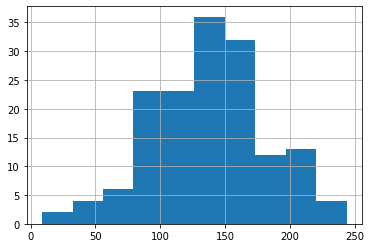

In [ ]:
dfs['NN13-1012346'].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 50)'>

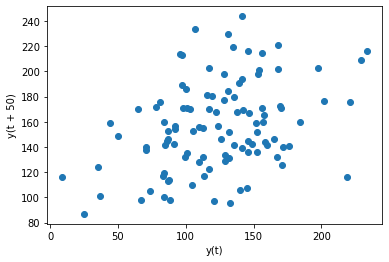

In [ ]:
pd.plotting.lag_plot(dfs['NN13-1012346'],lag=50)

<AxesSubplot:>

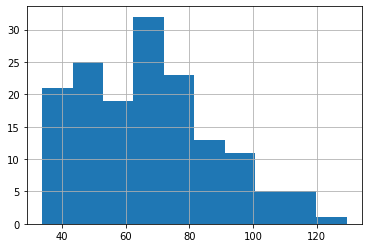

In [ ]:
dfs['NN13-1019943'].hist()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

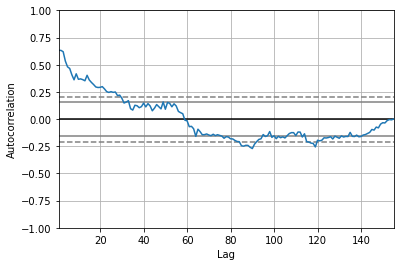

In [ ]:
pd.plotting.autocorrelation_plot(dfs['NN13-1012346'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

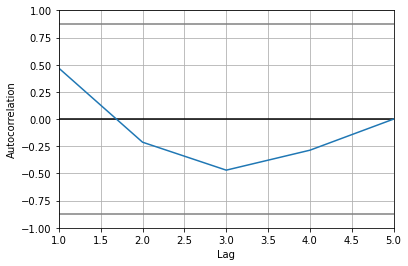

In [ ]:
pd.plotting.autocorrelation_plot(dfs['NN13-1012346'].resample("50w").mean())

In [ ]:
dfs

Codmat,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000845,NN13-1000849,NN13-1000852,NN13-1000853,...,NNB8-1035619_IQR,NNB8-1042123_IQR,NNB8-1043327_IQR,NNB8-1043643_IQR,NNB8-1045787_IQR,NNB8-1046292_IQR,NNB8-1047173_IQR,NNB8-1047642_IQR,NNB8-1053497_IQR,NNB8-1054251_IQR
semana,,,,,,,,,,,,,,,,,,,,,
2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.500,1842.0,433.000,1055.00,644.0,...,72.0,100.000,718.0000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.000,2863.0,371.000,1068.00,630.0,...,70.0,138.000,719.5000,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.500,1543.0,796.000,1685.00,773.0,...,24.0,159.000,792.9375,602.0,159.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.000,2294.0,723.000,2500.00,1138.0,...,47.0,171.000,792.9375,424.0,1.0,1668.529,14.0625,NaN,NaN,NaN
2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.000,1805.0,589.000,1702.00,1093.0,...,59.0,186.000,731.7500,688.0,107.0,1541.282,14.0625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,1869.0,1180.000,1134.0,667.5,68.0,1584.500,4589.0,562.000,837.00,656.0,...,62.0,60.000,501.6370,1025.5,630.2,1668.529,144.8710,161.0,534.909,30.0
2023-01-23,1573.0,319.667,866.0,636.5,177.0,1270.438,2134.0,461.757,780.75,421.0,...,44.0,47.236,597.0000,1180.0,331.0,1476.067,121.0120,72.0,389.909,39.0
2023-01-30,2155.0,484.333,1074.0,647.0,36.0,891.000,4432.0,508.000,886.00,957.0,...,42.0,51.000,498.0000,1036.0,452.9,1554.283,88.1840,121.0,460.909,16.0


In [ ]:
dfs_2=dfs.reset_index()
dfs_2

Codmat,semana,NN13-1000497,NN13-1000498,NN13-1000794,NN13-1000820,NN13-1000821,NN13-1000833,NN13-1000845,NN13-1000849,NN13-1000852,...,NNB8-1035619_IQR,NNB8-1042123_IQR,NNB8-1043327_IQR,NNB8-1043643_IQR,NNB8-1045787_IQR,NNB8-1046292_IQR,NNB8-1047173_IQR,NNB8-1047642_IQR,NNB8-1053497_IQR,NNB8-1054251_IQR
0,2020-03-02,1891.0,544.333,4370.0,489.5,56.0,976.500,1842.0,433.000,1055.00,...,72.0,100.000,718.0000,614.0,126.0,1301.854,NaN,NaN,NaN,NaN
1,2020-03-09,1393.0,1095.333,3421.0,782.5,70.0,1177.000,2863.0,371.000,1068.00,...,70.0,138.000,719.5000,617.0,203.0,1334.426,NaN,NaN,NaN,NaN
2,2020-03-16,2639.0,305.000,4253.0,354.0,66.0,515.500,1543.0,796.000,1685.00,...,24.0,159.000,792.9375,602.0,159.0,1668.529,14.0625,NaN,NaN,NaN
3,2020-03-23,2957.0,220.334,6052.0,564.0,80.0,950.000,2294.0,723.000,2500.00,...,47.0,171.000,792.9375,424.0,1.0,1668.529,14.0625,NaN,NaN,NaN
4,2020-03-30,2680.0,347.333,4788.0,462.5,44.0,907.000,1805.0,589.000,1702.00,...,59.0,186.000,731.7500,688.0,107.0,1541.282,14.0625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2023-01-16,1869.0,1180.000,1134.0,667.5,68.0,1584.500,4589.0,562.000,837.00,...,62.0,60.000,501.6370,1025.5,630.2,1668.529,144.8710,161.0,534.909,30.0
151,2023-01-23,1573.0,319.667,866.0,636.5,177.0,1270.438,2134.0,461.757,780.75,...,44.0,47.236,597.0000,1180.0,331.0,1476.067,121.0120,72.0,389.909,39.0
152,2023-01-30,2155.0,484.333,1074.0,647.0,36.0,891.000,4432.0,508.000,886.00,...,42.0,51.000,498.0000,1036.0,452.9,1554.283,88.1840,121.0,460.909,16.0
153,2023-02-06,2164.0,780.001,1194.0,786.5,232.0,934.000,3341.0,440.000,784.00,...,72.0,51.000,475.2500,1172.0,436.0,1418.281,69.1840,101.0,434.545,18.0


In [ ]:
codmats=dfs_2.columns.values[1:]
codmats

In [ ]:
dfs_2['semana']

0     2020-03-02
1     2020-03-09
2     2020-03-16
3     2020-03-23
4     2020-03-30
         ...    
150   2023-01-16
151   2023-01-23
152   2023-01-30
153   2023-02-06
154   2023-02-13
Name: semana, Length: 155, dtype: datetime64[ns]

In [ ]:
dfs_2.columns.values[1:].tolist()

In [ ]:
dfs_long = pd.melt(dfs_2, id_vars=dfs_2.columns.values[:1], value_vars=dfs_2.columns.values[1:])

In [ ]:
dfs_long 

,semana,Codmat,value
0,2020-03-02,NN13-1000497,1891.0
1,2020-03-09,NN13-1000497,1393.0
2,2020-03-16,NN13-1000497,2639.0
3,2020-03-23,NN13-1000497,2957.0
4,2020-03-30,NN13-1000497,2680.0
...,...,...,...
145385,2023-01-16,NNB8-1054251_IQR,30.0
145386,2023-01-23,NNB8-1054251_IQR,39.0
145387,2023-01-30,NNB8-1054251_IQR,16.0
145388,2023-02-06,NNB8-1054251_IQR,18.0


In [ ]:
df_semanaAgrupado =df.groupby(['semana','semanacalendario'])
df_semanaAgrupado

In [ ]:
dfs_long_w=dfs_long.merge(df,on='semana',how='left')

In [ ]:
dfs_long_w

,semana,Codmat_x,value,Codmat_y,cant,semanacalendario
0,2020-03-02,NN13-1000497,1891.0,NN13-1000497,1891.000,2020.10
1,2020-03-02,NN13-1000497,1891.0,NN13-1000498,544.333,2020.10
2,2020-03-02,NN13-1000497,1891.0,NN13-1000794,4370.000,2020.10
3,2020-03-02,NN13-1000497,1891.0,NN13-1000814,10.000,2020.10
4,2020-03-02,NN13-1000497,1891.0,NN13-1000820,489.500,2020.10
...,...,...,...,...,...,...
73997877,2023-02-13,NNB8-1054251_IQR,10.0,NNB8-1045787,420.600,2023.07
73997878,2023-02-13,NNB8-1054251_IQR,10.0,NNB8-1047173,68.811,2023.07
73997879,2023-02-13,NNB8-1054251_IQR,10.0,NNB8-1047642,132.000,2023.07
73997880,2023-02-13,NNB8-1054251_IQR,10.0,NNB8-1053497,342.000,2023.07
